In [1]:
import quanguru as qg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib as mpl

# Single qubit create, run, and plot

In [2]:
# create a qubit
qub = qg.Qubit()

# its default Hamiltonian is frequency*sigma_z. sigma_z is already there and can be changed to some other operator. but need to assign a frequency
qub.frequency = 1
qub.initialState = [0, 1]

qub.simTotalTime = 4
qub.simStepSize = 0.01

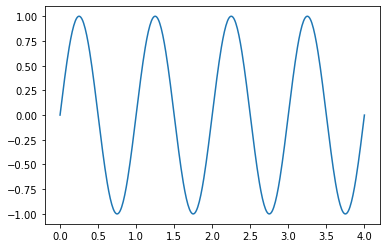

In [3]:
qub.runSimulation()

sy = qg.sigmay()
syexp = []
for st in qub.states:
    syexp.append(qg.expectation(sy, st))

plt.plot(qub.simulation.timeList, syexp)

#### An alternative

dimension? Qubit2


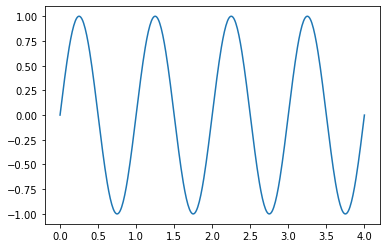

In [4]:
sim = qg.Qubit(frequency = 1, initialState = [0, 1], simTotalTime = 4, simStepSize = 0.01).runSimulation()
sy = qg.sigmay()
syexp = []
for st in sim.getByNameOrAlias("Qubit2").states:
    syexp.append(qg.expectation(sy, st))
plt.plot(sim.timeList, syexp)

# Qubit frequency sweep

In [5]:
qub3 = qg.Qubit(frequency = 1, initialState = [0, 1], simTotalTime = 4, simStepSize = 0.02)
freqSweep = qub3.simulation.Sweep.createSweep(system="Qubit3", sweepKey="frequency", sweepList=np.arange(-1, 1, 0.02))

dimension? Qubit3


In [6]:
%%time
qub3.runSimulation(p=True)

CPU times: user 684 ms, sys: 74.7 ms, total: 758 ms
Wall time: 1.3 s


In [7]:
%%time
syexp = []
for stL in qub3.states:
    tt = []
    for st in stL:
        tt.append(qg.expectation(sy, st))
    syexp.append(tt)

CPU times: user 9.01 s, sys: 218 ms, total: 9.23 s
Wall time: 9.41 s


CPU times: user 85.4 ms, sys: 11.1 ms, total: 96.4 ms
Wall time: 96.9 ms


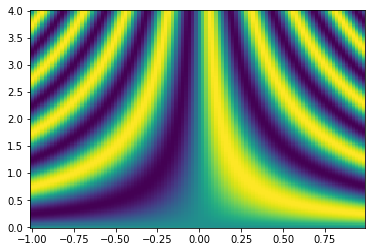

In [8]:
%%time
Y, X = np.meshgrid(qub3.simulation.timeList, freqSweep.sweepList)
plt.pcolormesh(X, Y, syexp)

# Qubit frequency sweep and compute

In [9]:
def comp(simOB, st):
    simOB.qRes.result = ["y", qg.expectation(sy, st[0])]
qub4 = qg.Qubit(frequency = 1, initialState = [0, 1], simTotalTime = 4, simStepSize = 0.02, simCompute=comp)
freqSweep = qub4.simulation.Sweep.createSweep(system=qub4, sweepKey="frequency", sweepList=np.arange(-1, 1, 0.02))

dimension? Qubit4


In [10]:
%%time
qub4.runSimulation(p=True)

CPU times: user 900 ms, sys: 94.1 ms, total: 994 ms
Wall time: 4.83 s


CPU times: user 23.5 ms, sys: 5.06 ms, total: 28.5 ms
Wall time: 26.4 ms


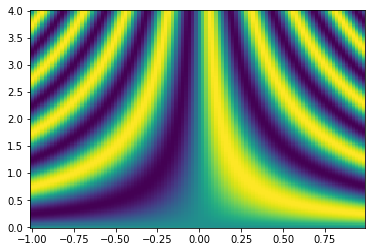

In [11]:
%%time
Y, X = np.meshgrid(qub4.simulation.timeList, freqSweep.sweepList)
plt.pcolormesh(X, Y, qub4.simulation.results["y"])